## TF Estimator

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [3]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpftfda5k1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6dbc97ec88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [4]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5 * x_data) + 5 + noise

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [7]:
x_train.shape

(700000,)

In [8]:
x_eval.shape

(300000,)

In [9]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [10]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [11]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [12]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpftfda5k1/model.ckpt.
INFO:tensorflow:loss = 416.32397, step = 1
INFO:tensorflow:global_step/sec: 479.697
INFO:tensorflow:loss = 25.231777, step = 101 (0.211 sec)
INFO:tensorflow:global_step/sec: 679.282
INFO:tensorflow:loss = 27.971249, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 683.054
INFO:tensorflow:loss = 8.635664, step = 301 (0.146 sec)
INFO:tensorflow:global_step/sec: 668.212
INFO:tensorflow:loss = 16.904669, step = 401 (0.150 sec)
INFO:tensorflow:global_step/sec: 648.183
INFO:tensorflow:loss = 11.57011, step = 501 (0.154 sec)
INFO:tensorflow:global_step/sec: 668.819
INFO:tensorflow:loss = 6.5954514, step = 601 (0.149 sec)
INFO:tensorflow:global_step/sec: 631.67
INFO:tensorflow:los

In [13]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-18-10:13:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpftfda5k1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-18-10:13:20
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0858878, global_step = 1000, label/mean = 7.5177984, loss = 8.687102, prediction/mean = 7.4798746
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [14]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-18-10:13:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpftfda5k1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-18-10:13:22
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0679432, global_step = 1000, label/mean = 7.4790215, loss = 8.543546, prediction/mean = 7.4581156
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [15]:
train_metrics

{'average_loss': 1.0858878,
 'label/mean': 7.5177984,
 'loss': 8.687102,
 'prediction/mean': 7.4798746,
 'global_step': 1000}

In [16]:
eval_metrics

{'average_loss': 1.0679432,
 'label/mean': 7.4790215,
 'loss': 8.543546,
 'prediction/mean': 7.4581156,
 'global_step': 1000}

In [17]:
brand_new_data = np.linspace(0,10,10)

In [18]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [19]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpftfda5k1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4658813], dtype=float32)},
 {'predictions': array([5.135358], dtype=float32)},
 {'predictions': array([5.8048344], dtype=float32)},
 {'predictions': array([6.4743104], dtype=float32)},
 {'predictions': array([7.1437874], dtype=float32)},
 {'predictions': array([7.813263], dtype=float32)},
 {'predictions': array([8.482739], dtype=float32)},
 {'predictions': array([9.152216], dtype=float32)},
 {'predictions': array([9.821693], dtype=float32)},
 {'predictions': array([10.491169], dtype=float32)}]

In [20]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpftfda5k1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [21]:
predictions

[array([4.4658813], dtype=float32),
 array([5.135358], dtype=float32),
 array([5.8048344], dtype=float32),
 array([6.4743104], dtype=float32),
 array([7.1437874], dtype=float32),
 array([7.813263], dtype=float32),
 array([8.482739], dtype=float32),
 array([9.152216], dtype=float32),
 array([9.821693], dtype=float32),
 array([10.491169], dtype=float32)]

In [22]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])
my_data = pd.concat([x_df, y_df], axis=1)

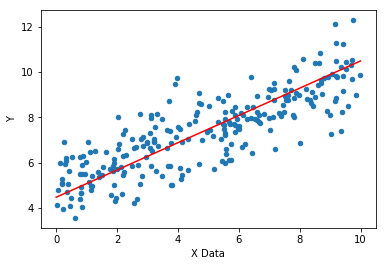

In [23]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')